# Machine Learning 1
In this exercise, you will practice prediction, including regression and classification, using the [scikit-learn library](https://scikit-learn.org/stable/index.html). Note that scikit-learn is included in the Anaconda distribution, so you should not need to install anything new to use it.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

### Question 1
Below we import the `penguins` dataset containing information from a study of several hundred penguins including three different species on multiple islands. We preview the first few rows.

In [6]:
penguins = sns.load_dataset("penguins").dropna()
print(penguins.shape)
penguins.head()

(333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


We are interested in exploring the relationship between bills and flippers. In particular, in this question we will ask whether we can model/predict `flipper_length_mm` as a function of `bill_length_mm` and `bill_depth_mm`. To start, we draw the scatter plots of `flipper_length_mm` on the vertical y-axis versus `bill_length_mm` and `bill_depth_mm` on the horizontal x-axis of the two plots respectively.

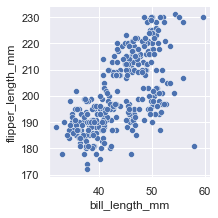

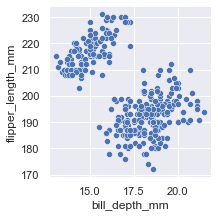

In [7]:
sns.relplot(data=penguins, x="bill_length_mm", y="flipper_length_mm", height=3)
sns.relplot(data=penguins, x="bill_depth_mm", y="flipper_length_mm", height=3)

There appears to be some sort of relationship between the dimensions of a penguin's bill and its flippers. Use scikit-learn to perform linear regression to model `flipper_length_mm` as a function of `bill_length_mm` and `bill_depth_mm`. Once you have fit the model, obtain the model predictions and compare them to the real `flipper_length_mm`. Compute both the MSE (mean squared error) and the r^2 score (the square of Pearson's correlation coefficient). Report the MSE and r^2 score.

Details:
- We import the relevant code from `sklearn` for you; you can find the documentation of the functions by searching the [scikit-learn library](https://scikit-learn.org/stable/index.html).
- You do not need to split the data into train/test sets for this problem, you can just use the whole dataset.
- You can use the default LinearRegression model, i.e., you do not need to pass any parameters to the constructor.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x = penguins[["bill_length_mm","bill_depth_mm"]]
y = penguins["flipper_length_mm"]
model = LinearRegression().fit(x, y)

y_true = penguins["flipper_length_mm"]
y_predicted = model.predict(penguins[["bill_length_mm","bill_depth_mm"]])
mse = mean_squared_error(y_true, y_predicted)
r_squared = r2_score(y_true, y_predicted)

In [9]:
print("MSE: ", mse)
print("r^2: ", r_squared)

MSE:  74.37425599612503
r^2:  0.6202523002022253


### Question 2
One way to improve the performance of our regression model for the prediction task described in question 1 is to include the `species` and `sex` features. That is, we now want to model/predict `flipper_length_mm` as a function of `bill_length_mm`, `bill_depth_mm`, `species`, and `sex`. However, the `species` and `sex` features are both categorical. Compute a one hot encoding (using `OneHotEncoder` imported for you below) of the `species` and `sex` data, combine that with the numerical `bill_length_mm` and `bill_depth_mm` data, and fit a linear regression model on all of the inputs. 

As in question 1, once you have fit the model, obtain the model predictions and compare them to the real `flipper_length_mm`. Compute both the MSE (mean squared error) and the r^2 score (the square of Pearson's correlation coefficient). Report the MSE and r^2 score.

In [10]:
from sklearn.preprocessing import OneHotEncoder

categories = penguins[["species","sex"]]
drop_enc = OneHotEncoder().fit(categories)
new_enc = pd.DataFrame(drop_enc.transform(categories).toarray(), columns=["Adelie","Chinstrap","Gentoo","Female","Male"])
new_df = pd.concat([penguins.reset_index(drop=True), new_enc], axis=1)
model2 = LinearRegression().fit(new_df[["bill_length_mm","bill_depth_mm","Adelie","Chinstrap","Gentoo","Female","Male"]], new_df["flipper_length_mm"])
mse2 = mean_squared_error(new_df["flipper_length_mm"], model2.predict(new_df[["bill_length_mm","bill_depth_mm","Adelie","Chinstrap","Gentoo","Female","Male"]]))
r_squared2 = r2_score(new_df["flipper_length_mm"], model2.predict(new_df[["bill_length_mm","bill_depth_mm","Adelie","Chinstrap","Gentoo","Female","Male"]]))

In [11]:
print("MSE: ", mse2)
print("r^2: ", r_squared2)

MSE:  29.28685536007724
r^2:  0.8504641719323027


### Question 3
In question 2 we showed that incorporating `species` and `sex` significantly improved the quality of our predictive model of `flipper_length_mm` as opposed to only predicting based on `bill_length_mm` and `bill_depth_mm`. One curious feature: in question 1, the fitted model has a negative coefficient for `bill_depth_mm` (meaning the model predicts penguins with deeper bills will have shorter flippers), but in question 2 the fitted model has a positive coefficient for `bill_depth_mm` (meaning the model predicts penguins with deeper bills will have longer flippers).

Using Seaborn (imported above as `sns`), create two visualizations. For the first, draw a scatter plot of `bill_depth_mm` on the horizontal x-axis and `flipper_length_mm` on the vertical y-axis and color the points by their `sex`. In the second, create the same scatter plot but color the points by their `species`. Referring to your visualizations to justify your answer, explain which of `sex` or `species` is likely to have caused the model coefficient for `bill_depth_mm` to change from negative to positive between question 1 and question 2.

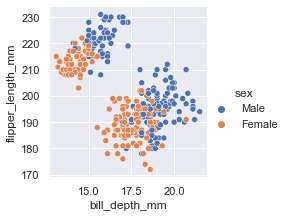

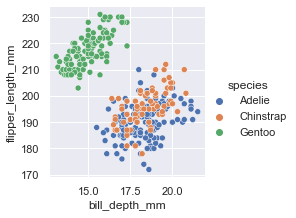

In [12]:
sns.relplot(data=penguins, x="bill_depth_mm", y="flipper_length_mm", height=3, hue = "sex")
sns.relplot(data=penguins, x="bill_depth_mm", y="flipper_length_mm", height=3, hue = "species")

### Answer 3
- In the first graph colored by sex, we can observe that male sex and female sex both form two distinct clusters respectively. In both cases, bill depth is negatively correlated with flipper length. 
- In the second graph colored by species, we can observe that the Gentoo species form a distinct cluster characterized by shorter bill depths and longer flipper lengths while the Adetie and Chinstrap species have more similarly clustered values of longer bill depths and shorter flipper lengths. 
- Species is likely to have caused the model coefficient for bill_depth_mm to change from negative to positive between question 1 and question 2. This is because without accounting for species, sex alone shows a negative correlation between bill depth and flipper length. However, after taking species into account, there is a positive correlation between bill depth and flipper length within each species. For example, in the Gentoo species cluster, we notice that lower bill depths correspond to lower flipper lengths and higher bill depths correspond to higher flipper lengths.

### Question 4
Below we import the `cancer` dataset that contains information from a study of several hundred tumors/masses, some of which are `benign` (not cancerous), and some of which are `malignant` (cancerous). Use logistic regression to model/predict whether a `tumor` is benign or malignant using all of the other features in the dataset. Once you have fit a model, make predictions for all of the data and then compute and report the `accuracy_score` of your predictions. Also plot the confusion matrix for your predictions. How many false positives are there (treating `malignant` as the positive class)? How many false negatives (treating `benign` as the negative class)?.

Details:
- We import the relevant code from `sklearn` for you; you can find the documentation of the functions by searching the [scikit-learn library](https://scikit-learn.org/stable/index.html).
- You do not need to split the data into train/test sets for this problem, you can just use the whole dataset.
- You can use the default LogisticRegression model, i.e., you do not need to pass any parameters to the constructor.

In [13]:
cancer = pd.read_csv("cancer.csv")
cancer.head()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,tumor
0,5,1,1,1,2,3,1,1,benign
1,5,4,4,5,7,3,2,1,benign
2,3,1,1,1,2,3,1,1,benign
3,6,8,8,1,3,3,7,1,benign
4,4,1,1,3,2,3,1,1,benign


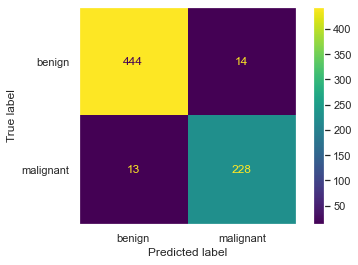

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt # just to format confusion matrix

x = cancer[["clump_thickness", "uniformity_cell_size", "uniformity_cell_shape", "marginal_adhesion", "epithelial_cell_size", "bland_chromatin", "normal_nucleoli", "mitoses"]]
y = cancer["tumor"]
model3 = LogisticRegression().fit(x, y)
plot_confusion_matrix(model3, x, y)  
plt.grid(False)

In [15]:
print("Accuracy Score: ", accuracy_score(model3.predict(x), y))

Accuracy Score:  0.9613733905579399


### Answer 4
The classification accuracy is about 0.96. The confusion matrix shows that there are 14 false positives and 13 false negatives.

### Question 5
A false negative is arguably a much more dangerous mistake for this prediction task than a false positive. Fortunately, it is easy to tune logistic regression to prioritize avoiding false negatives by changing the threshold for which we predict the positive versus the negative class. Instead of calling `.predict()` on your logistic regression model from question 4, use [`.predict_proba()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression.predict_proba) to get the probabilities estimated by the regression model that each tumor is either `benign` or `malignant`. Use this to create a new list/array of predictions by predicting `malignant` when the probability is at least 0.1 and `benign` otherwise. 

Using your new predictions, again compute and report the `accuracy_score` of your predictions. Also plot the confusion matrix for your predictions. Note that you will not be able to use `plot_confusion_matrix` as above because it requires a `sklearn` estimator and we are manually changing the predictions. You can use `confusion_matrix` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix)) to simply pass your predictions and the true values and get the confusion matrix as a 2d array to print; it displays the values in the same orientation as the confusion matrix plot from the previous question. How many false positives are there (treating `malignant` as the positve class)? How many false negatives (treating `benign` as the negative class)?.

In [16]:
from sklearn.metrics import confusion_matrix

y_pred_prob = np.where(model3.predict_proba(x)[:,1]<0.1, "benign", "malignant") 
print("Accuracy Score: ", accuracy_score(y_pred_prob, y))
print(confusion_matrix(y_pred_prob, y))

Accuracy Score:  0.9570815450643777
[[430   2]
 [ 28 239]]


### Answer 5
The classification accuracy isabout 0.957 (almost the same as before). However, we now make 28 false positives and just 2 false negatives.

### Question 6
In the previous two questions we were predicting on just two classes and the input data were numerical. In this question, we work with the `20newsgroups` dataset. It contains internet posts in raw text classified into one of 20 types. Below we import the dataset and print the names of the 20 classes of posts. `data` contains the text of the posts themselves and `target` contains numbers corresponding to the classes of the posts. For context we preview part of the first post in `data`, which is about sports.

In [17]:
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset="all")
print(news.target_names, "\n")
data = news["data"]
target = news["target"]
print(data[0][192:600])

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc'] 

I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular sea


Now we use the `train_test_split` function from scikit-learn to hold out 30% of the data for the testing, and keep the remaining 70% of the data for training / fitting a model.

In [23]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, 
                                                                    test_size=0.3, 
                                                                    random_state=216)

Vectorize the text data using the scikit-learn `CountVectorizer` (imported below), fit a Naive Bayes model on the training data (use `MultinomialNB` from scikit-learn, also imported below), and predict the class of the test data. You may find it convenient to do so using a scikit-learn pipeline, though it is not required. You can use the default parameters for both the `CountVectorizer` and `MultinomialNB`. When you have fit your model, compute and report the `accuracy_score` of your predictions for the test data.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

nb_model = make_pipeline(CountVectorizer(), MultinomialNB())
nb_model.fit(train_data, train_target)
print("Accuracy Score: ", accuracy_score(nb_model.predict(test_data), test_target))

Accuracy Score:  0.850017686593562


### Answer 6
Test classification accuracy: 0.850017686593562

### Question 7
In this question we consider the famous `iris` dataset. It contains data about three different species of flowers. Below, we import the dataset, preview the first few rows, and then plot all pairwise scatterplots of the numerical features, coloring the points by their class (i.e., the flower species).

In [25]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


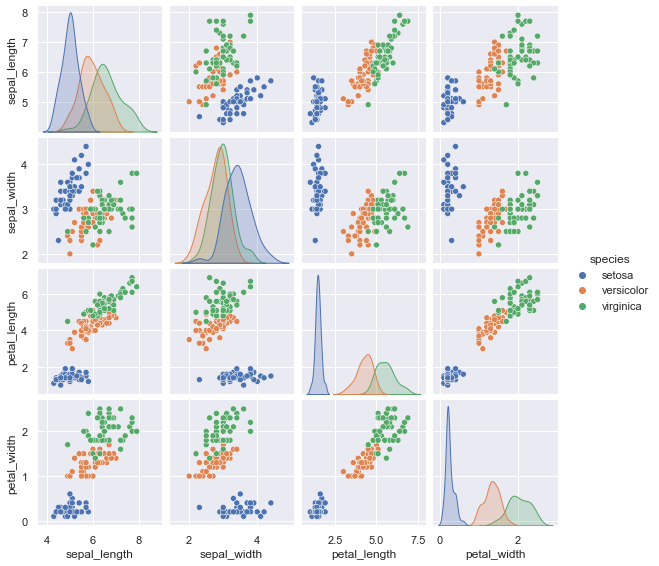

In [26]:
sns.pairplot(iris, height=2, hue="species")

We want to build a predictive model for classifying the `species` of a flower given measurements of its `sepal_length`, `sepal_width`, `petal_length`, and `petal_width`. To do so, we first use a `StandardScalar` to scale the numerical features, then split the data into training and testing sets.

In [27]:
from sklearn.preprocessing import StandardScaler
data = iris.iloc[:,:4].values
data = StandardScaler().fit_transform(data)
target = iris["species"].values
train_data, test_data, train_target, test_target = train_test_split(data, target, 
                                                                    test_size=0.3, 
                                                                    random_state=216)

Use a k-nearest neighbors classifier for your model that predicts `species` given the four numerical features. We import the relevant `KNeighborsClassifier` for you below. Recall that an important hyperparameter of a k-nearest neighbor model is k, or the `n_neighbors` parameter to the `KNeighborsClassifier()` constructor. 

Use 5-fold cross validation to search for the best value of `n_neighbors` in validation on the training set from among possible values between 1 and 30. You can either do so using `cross_validate` to check each possible setting directly, or you can use a `GridSearchCV` to perform the search automatically during fitting. If you search manually, take the average of the five scores for 5-fold cross validation, for each value. If you use `GridSearchCV`, note that the `GridSearchCV` object can itself fit and predict, and that you can get the optimal setting after fitting with `.best_params_`. Report the optimal value of `n_neighbors`.

When you have fit your model with the optimal `n_neighbors` value on the training data, make predictions for the test data. Compute and report the `accuracy_score` of your model in testing.  

In [30]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Write your code for question 7 here
trials = {'n_neighbors': range(1, 20)}
knn = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = trials)
knn.fit(train_data, train_target)
print(knn.best_params_)
model4 = KNeighborsClassifier(n_neighbors=10)
model4.fit(train_data, train_target)
print("Accuracy Score: ", accuracy_score(model4.predict(test_data), test_target))

{'n_neighbors': 10}
Accuracy Score:  0.9555555555555556


### Answer 7
- {'n_neighbors': 10}
- Accuracy Score:  0.9555555555555556